In [104]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('summer_internship_takehome.csv')

#distribution histogram
def histogram(df, metric):
    fig,ax = plt.subplots(figsize=(10,10))
    n,bins,patches = ax.hist(df, 40, density=1, facecolor='blue', alpha=0.5, edgecolor='black')
    ax.set_title(f'Distribution of {metric} Profit Margin', fontsize=15)
    ax.set_xlabel(f'{metric} Profit Margin (%)', fontsize=12)
    ax.set_ylabel('Probability', fontsize=12)
    
#line plot 
def line_plot(df, metric):
    fig,ax = plt.subplots(figsize=(10,10))
    ax.plot(list(df.columns), [sum(df[column]) for column in df.columns])
    ax.set_title(f"Aggregate {metric} Revenue", fontsize=15)
    ax.set_xlabel(f'{metric} Timeframe')
    ax.set_ylabel(f'Sum {metric} Revenue', fontsize=12)
    

#calculating profit margin (net_revenue/gross revenue) * 100
df['profit_margin'] = (df['Gross revenue'] - (df['Fixed cost'] + df['Variable cost'] + df['Rental cost']))/(df['Gross revenue']) * 100

#getting aggregate median and mean profit margins
df_mean = df.groupby('Location number').mean()['profit_margin']
df_median = df.groupby('Location number').median()['profit_margin']

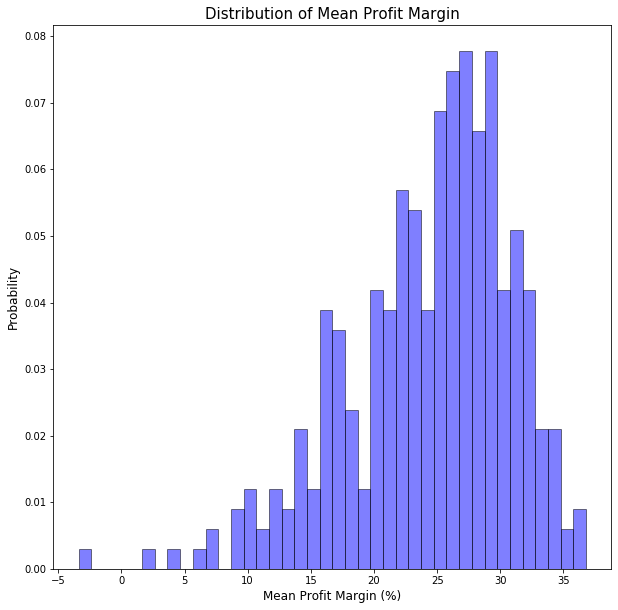

In [69]:
#distribution of median profit margin
histogram(df_mean, 'Mean')

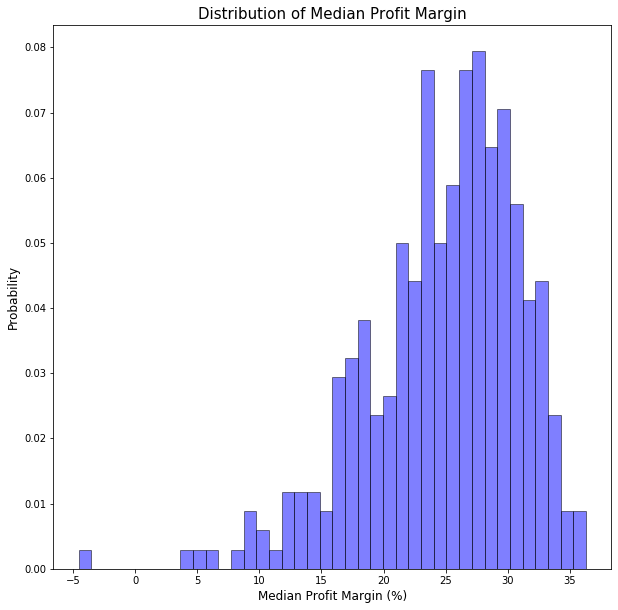

In [70]:
#distribution of median profit margin
histogram(df_median, 'Median')

In [134]:
#calculating monthly & quarterly revenue by transposing dataframe and aggregating into months/quarterly respectively
df_monthly = pd.pivot_table(df, index='Location number', columns='Month', values='Gross revenue')
df_monthly.columns = 'Jan Feb Mar Apr May Jun Jul Aug Sept Oct Nov Dec'.split(' ')

#quarterly revenue 
dic = {}
count = 1
for index in range(0, len(df_monthly.columns), 3):
    quarter = list(df_monthly.columns)[index:index+3]
    revenue_list = [sum(df_monthly[month]) for month in quarter]
    dic[f"Q{count}"] = sum(revenue_list)
    count += 1
df_quarterly = pd.DataFrame(dic, index=[0])

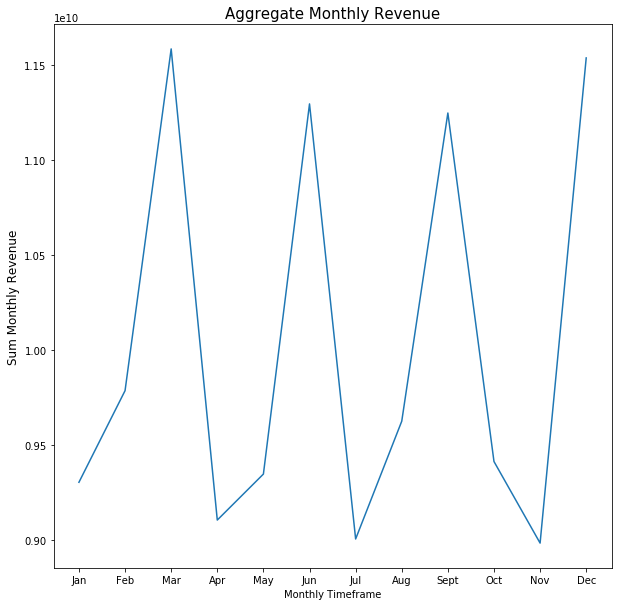

In [135]:
line_plot(df_monthly, 'Monthly')

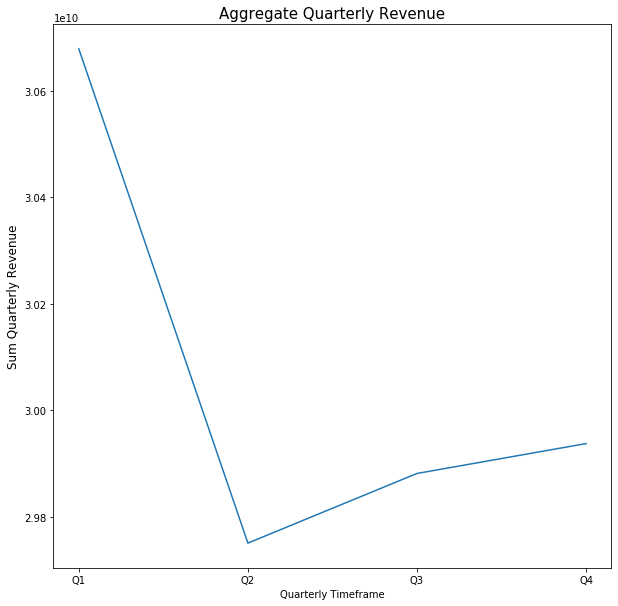

In [136]:
line_plot(df_quarterly, 'Quarterly')